<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/clustering_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8RFVjiTdVKNZfDw_wbgzrI9MjcqU3U_jJXQjeEA1bKqJZu8x-FDKAwnilzeauvEjQZOvpZR4ACA0s/pub?output=csv'
wine = pd.read_csv(url)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
# We are working with malic_acid and flavanoids
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [7]:
# Instantiate a scaler
scaler = StandardScaler()
# Scale the data
scaled_df = scaler.fit_transform(df)

Text(0, 0.5, 'Inertia')

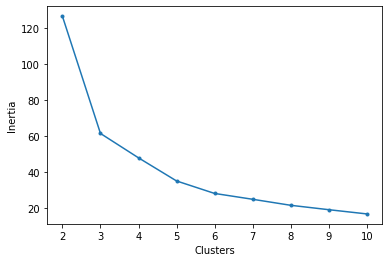

In [13]:
# Construct an elbow plot
inertias = []
# Loop through k = 2 to 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
# Plot the elbow plot
plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Scores')

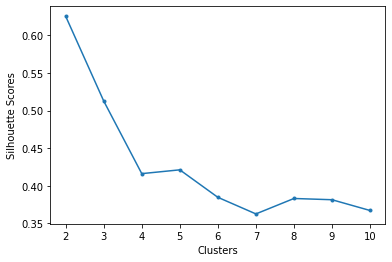

In [22]:
# Evaluate on silhouette scores
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Plot the scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')

In [24]:
# Get the silhouette score for k = 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

In [26]:
# Compare the clusters for k = 2 and k = 3
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


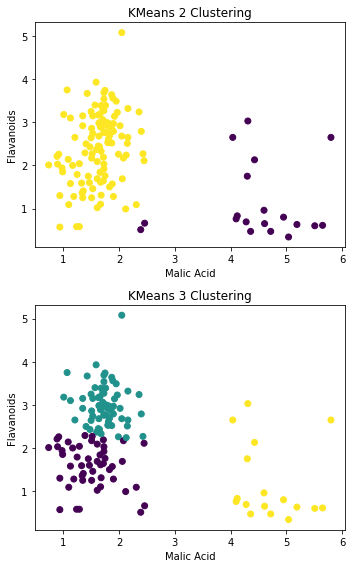

In [40]:
# Visualize the clusters
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
fig, axes = plt.subplots(2, 1, figsize = (5, 8));
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2']);
axes[0].set_xlabel('Malic Acid');
axes[0].set_ylabel('Flavanoids');
axes[0].set_title('KMeans 2 Clustering');
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clustering')
plt.tight_layout()